# AirBnB & Zillow Analysis using Python





Firstly, let's install common Python Libraries into our Kernel


In [1]:
# Normal Python Libraries imported i.e. Numpy & Pandas
import numpy as np
import pandas as pd

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt


#This is Regular Expression Library which would come handy in Data cleansing
import re

# Command so that plots appear in the iPython Notebook
%matplotlib inline

# This is to ignore warnings
import warnings                                  # `do not disturb` mode
warnings.filterwarnings('ignore')

Now that we have our libraries in place, let's start by loading Listings.csv data into a dataframe

In [2]:
# Using Pandas to read records from the file & storing it in a dataframe

listings = pd.read_csv('listings.csv')

# Getting top 5 row from the csv file
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,20170502132028,2017-05-03,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,...,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,20170502132028,2017-05-04,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN
2,1886820,https://www.airbnb.com/rooms/1886820,20170502132028,2017-05-04,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
3,6627449,https://www.airbnb.com/rooms/6627449,20170502132028,2017-05-05,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,10.0,f,NaN,NaN,f,strict,f,f,1,0.54
4,5557381,https://www.airbnb.com/rooms/5557381,20170502132028,2017-05-04,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",none,"City Island is unique in two ways. First, you ...",...,10.0,f,NaN,NaN,t,moderate,f,f,1,3.63


Similarly, let's load ZIHV dataset into a dataframe

In [3]:
# Using Pandas to read records from the file & storing it in a dataframe

zillow = pd.read_csv('Zip_Zhvi_2bedroom.csv')

# Getting top 5 row from the csv file

zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


# 1. Data Exploration:

Let's understand the data we have in our Dataframes 

In [4]:
listings.describe() #This gives description of data

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,4.075300e+04,4.075300e+04,4.075300e+04,0.0,40502.000000,40502.000000,40753.000000,40753.000000,40753.000000,40594.000000,...,30829.000000,30736.000000,30768.000000,30717.000000,30767.000000,30716.000000,30714.000000,0.0,40753.000000,31454.000000
mean,9.912016e+06,2.017050e+13,3.059031e+07,NaN,2.220755,2.220755,40.730776,-73.955952,2.789120,1.125758,...,93.004379,9.531624,9.196080,9.709184,9.738259,9.417991,9.338282,NaN,1.662675,1.312114
std,5.582254e+06,1.529316e+01,3.267980e+07,NaN,15.840520,15.840520,0.053690,0.041214,1.821218,0.388174,...,8.584762,0.842565,1.118605,0.697351,0.675564,0.836230,0.896188,NaN,2.159644,1.757380
min,2.515000e+03,2.017050e+13,7.200000e+01,NaN,0.000000,0.000000,40.499794,-74.240843,1.000000,0.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,4.995083e+06,2.017050e+13,4.857042e+06,NaN,1.000000,1.000000,40.692356,-73.983946,2.000000,1.000000,...,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.250000
50%,1.001931e+07,2.017050e+13,1.805129e+07,NaN,1.000000,1.000000,40.724119,-73.957210,2.000000,1.000000,...,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.750000
75%,1.496799e+07,2.017050e+13,4.664988e+07,NaN,2.000000,2.000000,40.764489,-73.940474,4.000000,1.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.910000
max,1.851999e+07,2.017050e+13,1.284849e+08,NaN,855.000000,855.000000,40.912164,-73.711750,16.000000,8.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,35.000000,125.920000


Just by executing the above code, we can see that there are 32 columns which are of type numeric

Let's start digging deeper into this. We know that our end goal is to identify zipcodes which generate maximum profit in New York City. So let's see what kind of values we have in zipcode field in this dataframe.

In [5]:
listings['zipcode'].unique() #Gives unique values of zipcodes

array(['10464', '10467', '10469', '10462', '11105', '11102', '11370',
       '11106', nan, '11103', '11229', '10472', '10473', '11417', '11416',
       '11421', '11419', '11418', '10457', '10458', '10468', '10460',
       '11357', '10312', '10305', '11692', '11101', '11377', '10003',
       '11103-3233', '11356', '11214', '11228', '11360', '11361', '11364',
       '10280', '10006', '10282', '10004', '10012', '10005', '10033',
       '11209', '11220', '10306', '11691', '11233', '11206', '11221',
       '11205', '11216', '11238', '11211', '11213', '11237', '11226',
       '11207', '10013', '11694', '11001', '11426', '11427', '11426-1175',
       '11204', '11219', '11223', '11236', '11234', '11217', '11201',
       '11232', '11218', '11210', '11435', '11432', '11235', '11224',
       '11225', '11203', '11231', '10451', '10455', '10454', '11212',
       '11249', '11385', '10026', '11411', '11413', '11429', '11412',
       '10002', '10038', '10065', '11374', '11215', '10301', '10314',
     

We see that Zipcode has a datatype of object & has values like NaN, Floating Numbers, Numbers with Hyphens & Integers 

Simultaneously, let's have a look at Zipcodes from zillow dataframe

In [6]:
zillow['RegionName'].unique() #Gives unique values of zipcodes

array([10025, 60657, 10023, ..., 97028,  1338,  3293], dtype=int64)

Looks like Zipcodes in zillow dataframe are of datatype Integer & don't have any hyphen or NaN values in it.

# Data quality Insight for Zipcode in Listings dataframe

The Listings dataframe consists of values like NaN, Floating Numbers, Numbers with Hyphens which are not found in zillow dataframe. Notice the datatype for Zipcode is different in both dataframes & we have to decide a common ground for further analysis

Just because we are are asked to go with New York Market, let's check the field State in Listings dataframe

In [7]:
listings['state'].unique()

array(['NY', 'MP', 'New York', 'ny', 'NJ', 'VT'], dtype=object)

Looks like State field is an array comprising of various states. Notice that we have data for NY, New York & ny. 

Let's check whether this is the same case in Zillow dataframe

In [8]:
zillow['State'].unique()

array(['NY', 'IL', 'TX', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MD', 'MO',
       'VA', 'NJ', 'OK', 'OH', 'AZ', 'KS', 'NM', 'WA', 'CT', 'NV', 'MA',
       'PA', 'MI', 'CO', 'KY', 'OR', 'SC', 'IN', 'ND', 'AR', 'AL', 'MN',
       'DE', 'MS', 'ID', 'MT', 'WI', 'HI', 'UT', 'LA', 'RI', 'IA', 'NE',
       'WY', 'AK', 'NH', 'WV'], dtype=object)

Looks like States in Zillow dataframe are cleaned & are distinct. Notice that all the values are of 2 characters

# Data quality Insight for State in Listings dataframe

The State field in Listings dataframe consists of values which are not unique & are more than 2 characters long in comparison with Zillow dataframe


Let's see how cities are spread out in Listings dataframe

In [9]:
listings['city'].unique()

array(['Bronx', 'City Island', 'Bronx ', 'Queens', 'New York', 'Astoria',
       'Long Island City', 'Astoria ', 'astoria', 'East Elmhurst',
       'East Elmhurst ', 'ASTORIA', 'Astoria, New York ',
       'astoria, queens', 'Astoria, New York', nan, 'Queens ', 'astotia',
       'Astoria,New York ', 'Brooklyn', 'Brooklyn ', 'new york',
       'ozone park queens ', 'queens', 'Ozone Park', 'Ozone Park, Queens',
       'Kew Gardens', 'Whitestone ', 'Whitestone', 'Staten Island',
       'Staten Island ', 'Arverne', 'Arverne ', 'Averne', 'Far Rockaway ',
       'ARVERNE', 'Rockaway Beach', 'Rockaway Beach ', 'NY',
       'New York City', 'Long Island City ', 'Long Island city',
       'Astoria, Queens ', 'ASTORIA/LIC', 'Astoria, Queens', 'New York ',
       'Astoria Queens', 'Astoria - New York', 'Astoria New York',
       'NEW YORK', 'LONG ISLAND CITY', 'Astoria,Queens',
       'Astoria, N.Y.C.', 'LIC', 'Bayside', 'Oakland Gardens', 'Bayside ',
       'Bayside, Queens', 'Bay Ridge ', 'broo

Looks like City field is an array comprising of various cities around the world. The data looks spread out with extra spaces, Uppercase names, Numbers, Hyphens & much more.

Let's check whether this is the same case in Zillow dataframe

In [10]:
zillow['City'].unique()

array(['New York', 'Chicago', 'El Paso', ..., "Hart'S Location",
       'Waterville Valley', 'Shelburne Falls'], dtype=object)

Zillow dataframe has clean City data & has consistent spacing , First Letter Capitalized.  

# Data quality Insight for City in Listings dataframe

The City field in Listings dataframe is really a bad representation of City Names with inconsistent spaces, capitalization & numbers to name a few. 

# 2. Data Munging:

Let's look at the Time columns in Zillow dataframe

In [11]:
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


As we see the Date format followed to measure Cost of house is YYYY-MM in Zillow dataframe.

Now let's look at listings dataframe.

In [12]:
listings['last_scraped'].head()

0    2017-05-03
1    2017-05-04
2    2017-05-04
3    2017-05-05
4    2017-05-04
Name: last_scraped, dtype: object

As we see, the Listings dataframe has date format of YYYY-MM-DD. So we choose a common Datetime format i.e. YYYY-MM per Zillow dataframe

Notice that the time range in Zillows dataframe should be pivoted to join it with the Listings dataframe.

In [13]:
# pd.melt function helps us unpivot the existing pivoted data

zillow= pd.melt(zillow, id_vars=['RegionID','RegionName','City','State','Metro', 'CountyName','SizeRank'], 
              var_name='Date', value_name= 'Cost')

zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Cost
0,61639,10025,New York,NY,New York,New York,1,1996-04,NaN
1,84654,60657,Chicago,IL,Chicago,Cook,2,1996-04,167700.0
2,61637,10023,New York,NY,New York,New York,3,1996-04,NaN
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,195800.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,59100.0


After unpivoting the data, we find that there are values which are NaN & these values should be dropped are Cost should always be a number

In [14]:
zillow = zillow.dropna(subset=['Cost']) #Dropping NaN values

zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Cost
1,84654,60657,Chicago,IL,Chicago,Cook,2,1996-04,167700.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,195800.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,59100.0
5,84640,60640,Chicago,IL,Chicago,Cook,6,1996-04,123300.0
6,97564,94109,San Francisco,CA,San Francisco,San Francisco,7,1996-04,336800.0


Great! Now we have Date format in Zillow dataframe as YYYY-MM. Now let's change the Date format of Listings dataframe to be YYYY-MM  

In [15]:
# New date format matching that from Zillow using strftime function

listings['last_scraped']= pd.to_datetime(listings.last_scraped)
listings['Date'] = listings['last_scraped'].dt.strftime('%Y-%m')
listings['Date'].head()

0    2017-05
1    2017-05
2    2017-05
3    2017-05
4    2017-05
Name: Date, dtype: object

Now we have same datetime format in both the dataframe (Listings & Zillow) & the column name in both dataframe is same i.e. "Date"

We found a data quality insight in the Zipcode field of Listings dataframe. So let's clean this Zipcode field for Listings dataframe in comparison with Zillow dataframe

In [16]:
# Zipcode contains Hyphens ,NaN & is of datatype object
listings['zipcode']= listings['zipcode'].str.findall('\d{5}')


listings['zipcode']= listings['zipcode'].str[0]


listings = listings.dropna(subset=['zipcode'])


listings['zipcode']= listings['zipcode'].astype(int)


listings['zipcode'].head()

0    10464
1    10464
2    10464
3    10464
4    10464
Name: zipcode, dtype: int32

Perfect! Now the Zipcodes in Listings dataframe are cleaned as per Zillow dataframe & now both zipcodes are having datatype of Int

After going through the Zillow dataframe, you can see the column name RegionName which is Zipcode. Let's rename it for data consistency in both dataframe

In [17]:
zillow.rename(columns={'RegionName':'zipcode'}, inplace= True)

zillow.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,Date,Cost
1,84654,60657,Chicago,IL,Chicago,Cook,2,1996-04,167700.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,195800.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,59100.0
5,84640,60640,Chicago,IL,Chicago,Cook,6,1996-04,123300.0
6,97564,94109,San Francisco,CA,San Francisco,San Francisco,7,1996-04,336800.0


We know that the Zillow dataframe is for 2 bedroom properties. So to keep the data consistent in both dataframes, let's filter out Listings dataframe for 2 bedroom properties

In [18]:
listings = listings.loc[listings['bedrooms'] == 2]
listings['bedrooms'].head()

12    2.0
23    2.0
33    2.0
36    2.0
38    2.0
Name: bedrooms, dtype: float64

After going through the Zillow dataframe, you can also see the column name 'State'. Let's rename it for data consistency to 'state' in both dataframes

In [19]:
zillow.rename(columns={'State':'state'}, inplace= True)

zillow.rename(columns={'City':'city'}, inplace= True)

zillow.head()

,RegionID,zipcode,city,state,Metro,CountyName,SizeRank,Date,Cost
1,84654,60657,Chicago,IL,Chicago,Cook,2,1996-04,167700.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,195800.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,59100.0
5,84640,60640,Chicago,IL,Chicago,Cook,6,1996-04,123300.0
6,97564,94109,San Francisco,CA,San Francisco,San Francisco,7,1996-04,336800.0


To make both the dataframes consistent, let's drop the rows containing State value 'New York' & 'ny' in the Listings dataframe

In [20]:
listings= listings[listings['state'] != 'New York']

listings= listings[listings['state'] != 'ny']

listings['state'].unique()

array(['NY', 'NJ'], dtype=object)

Let's see what kind of data is present in Price column of Listings dataframe

In [21]:
listings['price'].unique()

array(['$130.00', '$150.00', '$200.00', '$250.00', '$79.00', '$225.00',
       '$100.00', '$160.00', '$252.00', '$126.00', '$67.00', '$134.00',
       '$89.00', '$175.00', '$125.00', '$137.00', '$70.00', '$199.00',
       '$210.00', '$205.00', '$120.00', '$60.00', '$140.00', '$180.00',
       '$110.00', '$52.00', '$99.00', '$90.00', '$174.00', '$65.00',
       '$85.00', '$101.00', '$115.00', '$87.00', '$109.00', '$222.00',
       '$185.00', '$186.00', '$105.00', '$76.00', '$239.00', '$155.00',
       '$119.00', '$108.00', '$290.00', '$289.00', '$198.00', '$195.00',
       '$280.00', '$170.00', '$135.00', '$275.00', '$152.00', '$129.00',
       '$45.00', '$350.00', '$231.00', '$300.00', '$325.00', '$450.00',
       '$475.00', '$128.00', '$116.00', '$30.00', '$33.00', '$800.00',
       '$95.00', '$165.00', '$151.00', '$159.00', '$197.00', '$164.00',
       '$83.00', '$102.00', '$93.00', '$139.00', '$50.00', '$107.00',
       '$71.00', '$245.00', '$215.00', '$80.00', '$189.00', '$145.00',

Looks like we have all $ values of Price. So let's convert this dollar value into number format as Price should be a number

In [22]:
listings[listings.columns[60:62]]=listings[listings.columns[60:62]].replace('[\$,]', '', regex=True).astype(float)
listings['price'].head()

12    130.0
23    150.0
33    200.0
36    250.0
38     79.0
Name: price, dtype: float64

Now that both the dataframes are consistent with Zipcodes, States & Date formats, let's create a scalable function to join these dataframes together

# Scalable Function

This function would take into account all the zipcodes & dates from 2 dataframes & join them together. This function would also take care of new future markets where company intends to grow.

Note: In this case, markets denote the States.

In [23]:
def merge_data(A,B,C,D):
    newdata= pd.merge(A,B,on=['zipcode','Date','state','city'], how='inner')
    newdata = newdata.loc[newdata['state'] == C]
    newdata = newdata.loc[newdata['city'] == D]
    return newdata

In [24]:
#Running
merge_data = merge_data (listings,zillow,'NY','New York')

merge_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Date,RegionID,Metro,CountyName,SizeRank,Cost
0,10990088,https://www.airbnb.com/rooms/10990088,20170502132028,2017-05-04,"Downtown, Renovated 2 Bedroom Apt",Hi! We are looking to rent our beautiful 2 bed...,NaN,Hi! We are looking to rent our beautiful 2 bed...,none,NaN,...,f,f,1,NaN,2017-05,61627,New York,New York,1744,3262200.0
1,17222386,https://www.airbnb.com/rooms/17222386,20170502132028,2017-05-04,Large 2br apt in NOLITA/LITTLE ITALY @,"My place is close to Broadway st. SoHo area, s...",Our apartment is located in Nolita right next ...,"My place is close to Broadway st. SoHo area, s...",none,NaN,...,f,f,1,NaN,2017-05,61627,New York,New York,1744,3262200.0
2,10881719,https://www.airbnb.com/rooms/10881719,20170502132028,2017-05-02,charming Soho/Little Italy nest,conveniently located at the centerpoint betwee...,NaN,conveniently located at the centerpoint betwee...,none,NaN,...,f,f,1,1.17,2017-05,61627,New York,New York,1744,3262200.0
3,13766593,https://www.airbnb.com/rooms/13766593,20170502132028,2017-05-03,"Charming 2 Bedroom In Chinatown, Soho little I...",Two bedroom apartment located in the heart of ...,Cozy two bedroom apartment located in the hear...,Two bedroom apartment located in the heart of ...,none,NaN,...,f,f,1,2.30,2017-05,61627,New York,New York,1744,3262200.0
4,1368674,https://www.airbnb.com/rooms/1368674,20170502132028,2017-05-03,"True NYC Experience, Two Bedrooms",A spacious and comfortable place to call home ...,***My calendar has been updated for autumn and...,A spacious and comfortable place to call home ...,none,Vibrant and great neighborhood. Subway is clo...,...,f,f,1,2.36,2017-05,61627,New York,New York,1744,3262200.0


In [25]:
merge_data.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,zipcode,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,RegionID,SizeRank,Cost
count,6.860000e+02,6.860000e+02,6.860000e+02,0.0,685.000000,685.000000,686.000000,686.000000,686.000000,686.000000,...,526.000000,528.000000,526.000000,526.00000,0.0,686.000000,539.000000,686.000000,686.000000,6.860000e+02
mean,9.299733e+06,2.017050e+13,2.841915e+07,NaN,2.889051,2.889051,10025.306122,40.755914,-73.982144,4.568513,...,9.644487,9.653409,9.756654,9.21673,NaN,1.313411,1.242245,61636.122449,290.145773,2.131885e+06
std,5.673507e+06,0.000000e+00,3.173441e+07,NaN,32.692426,32.692426,31.694014,0.027419,0.019325,1.411258,...,0.725743,0.846439,0.532473,0.96144,NaN,0.966306,1.333001,21.537464,520.365059,5.098866e+05
min,2.700600e+04,2.017050e+13,1.405500e+04,NaN,0.000000,0.000000,10003.000000,40.713990,-74.011341,1.000000,...,4.000000,2.000000,6.000000,2.00000,NaN,1.000000,0.020000,61617.000000,1.000000,1.390000e+06
25%,4.321336e+06,2.017050e+13,4.264326e+06,NaN,1.000000,1.000000,10011.000000,40.731653,-74.000498,4.000000,...,9.000000,10.000000,10.000000,9.00000,NaN,1.000000,0.230000,61625.000000,3.000000,1.720500e+06
50%,9.483206e+06,2.017050e+13,1.544863e+07,NaN,1.000000,1.000000,10014.000000,40.745694,-73.986392,4.000000,...,10.000000,10.000000,10.000000,9.00000,NaN,1.000000,0.660000,61628.000000,21.000000,2.109100e+06
75%,1.465333e+07,2.017050e+13,4.382991e+07,NaN,2.000000,2.000000,10025.000000,40.779462,-73.964950,6.000000,...,10.000000,10.000000,10.000000,10.00000,NaN,1.000000,1.995000,61639.000000,379.000000,2.419700e+06
max,1.850877e+07,2.017050e+13,1.277347e+08,NaN,855.000000,855.000000,10128.000000,40.807344,-73.944250,10.000000,...,10.000000,10.000000,10.000000,10.00000,NaN,12.000000,7.500000,61703.000000,1744.000000,3.262200e+06


# 3. Data Visualizations:

Let's see how the Average Cost i.e. Median Purchase value of House looks like in comparison with Zipcodes

In [26]:
ea=pd.DataFrame.pivot_table(merge_data,index=['zipcode'],values=['Cost'],aggfunc='mean',fill_value=0)#This calculates avg cost
ea.rename(columns={'Cost':'Avg Cost'}, inplace= True)
ea= ea.reset_index()
ea.head()

,zipcode,Avg Cost
0,10003,2109100
1,10011,2419700
2,10013,3262200
3,10014,2498400
4,10021,1774100


In [27]:
ea= ea.sort_values('Avg Cost', ascending=False).groupby('zipcode').head()#This groups by values in descending order
ea.head()

,zipcode,Avg Cost
2,10013,3262200
3,10014,2498400
1,10011,2419700
0,10003,2109100
6,10023,2095000


In [28]:
ea= ea[ea['Avg Cost'] != 0] #Removing all 0 values as they won't serve any meaning in this context

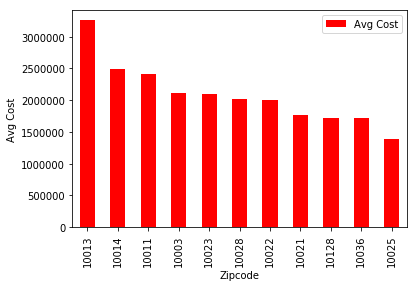

In [29]:
fig, ax = plt.subplots()
ea.plot(kind='bar',x='zipcode', y='Avg Cost', ax=ax, color='r')
ax.set_xlabel("Zipcode")
ax.set_ylabel('Avg Cost')
plt.show()

As you can see that the Average Cost (Median Purchase Value) of House is highest in Zipcode 10013 & lowest in 10025


Let's see how the Average Price i.e. The Amount host is charging to stay for one night looks like in comparison with Zipcodes

In [30]:
fa=pd.DataFrame.pivot_table(merge_data,index=['zipcode'],values=['price'],aggfunc='mean',fill_value=0)#This calculates avg price
fa.rename(columns={'price':'Avg Price'}, inplace= True)
fa= fa.reset_index()
fa.head()

,zipcode,Avg Price
0,10003,310.910714
1,10011,358.511628
2,10013,389.843750
3,10014,325.290323
4,10021,273.842105


In [31]:
fa= fa.sort_values('Avg Price', ascending=False).groupby('zipcode').head()#This groups by values in descending order
fa.head()

,zipcode,Avg Price
9,10036,445.272727
2,10013,389.843750
5,10022,367.289474
1,10011,358.511628
3,10014,325.290323


In [32]:
fa= fa[fa['Avg Price'] != 0] #Removing all 0 values as they won't serve any meaning in this context

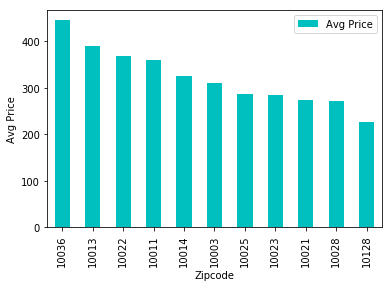

In [33]:
fig, ax = plt.subplots()
fa.plot(kind='bar',x='zipcode', y='Avg Price', ax=ax, color='c')
ax.set_xlabel("Zipcode")
ax.set_ylabel('Avg Price')
plt.show()

As you can see that the Average Price is highest in Zipcode 10036 & lowest in 10128


Let's see how the Total Listings Count looks like in comparison with Zipcodes

In [34]:
bc = merge_data[['zipcode', 'host_total_listings_count']] # New dataframe containing zipcodes & total listings

bc = bc.dropna(subset=['host_total_listings_count']) #Removing NaN values from the dataframe
bc.head()


,zipcode,host_total_listings_count
0,10013,1.0
1,10013,1.0
3,10013,1.0
4,10013,1.0
5,10013,1.0


In [35]:

bc=pd.DataFrame.pivot_table(bc,index=['zipcode'],values=['host_total_listings_count'],aggfunc='sum',fill_value=0) #Total listings
bc.rename(columns={'host_total_listings_count':'Number of Listings'}, inplace= True)
bc= bc.reset_index()
bc.head()

,zipcode,Number of Listings
0,10003,184
1,10011,124
2,10013,89
3,10014,143
4,10021,29


In [36]:
bc= bc.sort_values('Number of Listings', ascending=False).groupby('zipcode').head()#This groups by values in descending order
bc.head()

,zipcode,Number of Listings
9,10036,881
0,10003,184
6,10023,182
7,10025,176
3,10014,143


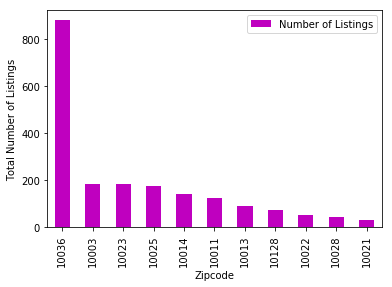

In [37]:
fig, ax = plt.subplots()
bc.plot(kind='bar',x='zipcode', y='Number of Listings', ax=ax, color='m')
ax.set_xlabel("Zipcode")
ax.set_ylabel('Total Number of Listings')
plt.show()

As you can see Zipcode 10036 has highest Number of properties the host has ever listed on AirBnB while 10021 has the lowest


Let's see how the Average Number of Reviews look like in comparison with Zipcodes

In [38]:
at=pd.DataFrame.pivot_table(merge_data,index=['zipcode'],values=['number_of_reviews'],aggfunc='mean',fill_value=0) #Calculates avg number of reviews
at.rename(columns={'number_of_reviews':'Avg Number of Reviews'}, inplace= True)
at= at[at['Avg Number of Reviews'] != 0]
at= at.reset_index()
at.head()

,zipcode,Avg Number of Reviews
0,10003,28.116071
1,10011,13.674419
2,10013,14.250000
3,10014,15.612903
4,10021,15.789474


In [39]:
at= at.sort_values('Avg Number of Reviews', ascending=False).groupby('zipcode').head()#This groups by values in descending order
at.head()

,zipcode,Avg Number of Reviews
0,10003,28.116071
5,10022,25.868421
9,10036,17.636364
7,10025,16.821429
4,10021,15.789474


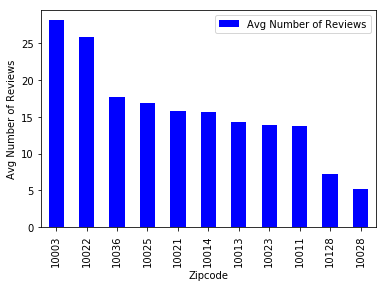

In [40]:
fig, ax = plt.subplots()
at.plot(kind='bar',x='zipcode', y='Avg Number of Reviews', ax=ax, color='b')
ax.set_xlabel("Zipcode")
ax.set_ylabel('Avg Number of Reviews')
plt.show()

As you can see Zipcode 10003 has highest Average Number of Reviews while 10028 has the lowest reviews. Which denotes the popular zipcodes

Number of Reviews can be misleading sometimes i.e. Maximum Reviews dosen't mean property is good & it can also mean the property is bad. Therefore let's see how the Review Scores Rating look like in comparison with Zipcodes.

In [41]:
gt=pd.DataFrame.pivot_table(merge_data,index=['zipcode'],values=['review_scores_rating'],aggfunc='mean',fill_value=0)
gt.rename(columns={'review_scores_rating':'Avg Review Rating'}, inplace= True)
gt= gt[gt['Avg Review Rating'] != 0]
gt = gt.dropna(subset=['Avg Review Rating'])
gt= gt.reset_index()
gt.head()

,zipcode,Avg Review Rating
0,10003,92.247191
1,10011,93.486486
2,10013,91.069767
3,10014,93.584416
4,10021,93.266667


In [42]:
gt= gt.sort_values('Avg Review Rating', ascending=False).groupby('zipcode').head()#This groups by values in descending order
gt.head()

,zipcode,Avg Review Rating
8,10028,94.888889
6,10023,94.360000
3,10014,93.584416
1,10011,93.486486
4,10021,93.266667


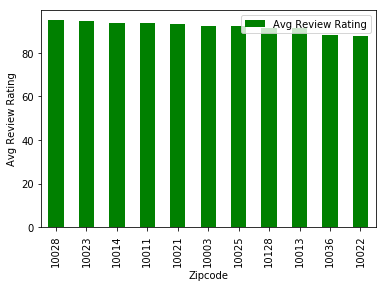

In [43]:
fig, ax = plt.subplots()
gt.plot(kind='bar',x='zipcode', y='Avg Review Rating', ax=ax, color='g')
ax.set_xlabel("Zipcode")
ax.set_ylabel('Avg Review Rating')
plt.show()

As you can see Zipcode 10028 has highest Average Review Rating while 10022 has the lowest review rating. This indicates which properties are actually good & can potentially be considered as an investment metric.

Also, Average Price to Average Number of Reviews could potentially be used as a measurement of profit as it denotes the frequency of tenants who are visiting the property & leaving reviews after their stay.

In [44]:
au= pd.merge(fa,at,on=['zipcode'], how='inner')
au.head()

,zipcode,Avg Price,Avg Number of Reviews
0,10036,445.272727,17.636364
1,10013,389.843750,14.250000
2,10022,367.289474,25.868421
3,10011,358.511628,13.674419
4,10014,325.290323,15.612903


In [45]:
#Calculating the frequency of tenants who are visiting the property 
au['Frequency of Tenants']= au['Avg Price']/au['Avg Number of Reviews']
au.head()

,zipcode,Avg Price,Avg Number of Reviews,frequency of tenants
0,10036,445.272727,17.636364,25.247423
1,10013,389.843750,14.250000,27.357456
2,10022,367.289474,25.868421,14.198372
3,10011,358.511628,13.674419,26.217687
4,10014,325.290323,15.612903,20.834711


In [46]:
au= au.sort_values('Frequency of Tenants', ascending=False).groupby('zipcode').head()#This groups by values in descending order
au

,zipcode,Avg Price,Avg Number of Reviews,frequency of tenants
9,10028,270.468750,5.156250,52.454545
10,10128,225.375000,7.196429,31.317618
1,10013,389.843750,14.250000,27.357456
3,10011,358.511628,13.674419,26.217687
0,10036,445.272727,17.636364,25.247423
4,10014,325.290323,15.612903,20.834711
7,10023,284.698413,13.825397,20.592423
8,10021,273.842105,15.789474,17.343333
6,10025,286.000000,16.821429,17.002123
2,10022,367.289474,25.868421,14.198372


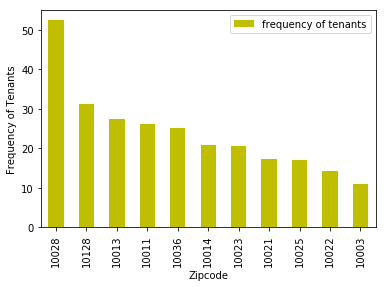

In [47]:
fig, ax = plt.subplots()
au.plot(kind='bar',x='zipcode', y='Frequency of Tenants', ax=ax, color='y')
ax.set_xlabel("Zipcode")
ax.set_ylabel('Frequency of Tenants')
plt.show()

As you can see Zipcode 10028 has highest frequency of tenants coming in & leaving reviews while 10003 has the lowest frequency of tenants.


Similarly, Average Price to Average Reviews Score Rating could also be used as a measurement of profit as it denotes the frequency of tenants who are visiting the property & leaving positive reviews for the property after their stay.

In [48]:
cu= pd.merge(fa,gt,on=['zipcode'], how='inner')
cu.head()

,zipcode,Avg Price,Avg Review Rating
0,10036,445.272727,87.857143
1,10013,389.843750,91.069767
2,10022,367.289474,87.645161
3,10011,358.511628,93.486486
4,10014,325.290323,93.584416


In [49]:
#Calculating the frequency of tenants who are visiting the property & leaving positive reviews for the property after their stay.
cu['Frequency of Tenants by review rating']= cu['Avg Price']/cu['Avg Review Rating']
cu.head()

,zipcode,Avg Price,Avg Review Rating,frequency of tenants by review rating
0,10036,445.272727,87.857143,5.068145
1,10013,389.843750,91.069767,4.280715
2,10022,367.289474,87.645161,4.190642
3,10011,358.511628,93.486486,3.834903
4,10014,325.290323,93.584416,3.475903


In [50]:
cu= cu.sort_values('Frequency of Tenants by review rating', ascending=False).groupby('zipcode').head()#This groups by values in descending order
cu

,zipcode,Avg Price,Avg Review Rating,frequency of tenants by review rating
0,10036,445.272727,87.857143,5.068145
1,10013,389.843750,91.069767,4.280715
2,10022,367.289474,87.645161,4.190642
3,10011,358.511628,93.486486,3.834903
4,10014,325.290323,93.584416,3.475903
5,10003,310.910714,92.247191,3.370408
6,10025,286.000000,92.024390,3.107872
7,10023,284.698413,94.360000,3.017151
8,10021,273.842105,93.266667,2.936120
9,10028,270.468750,94.888889,2.850373


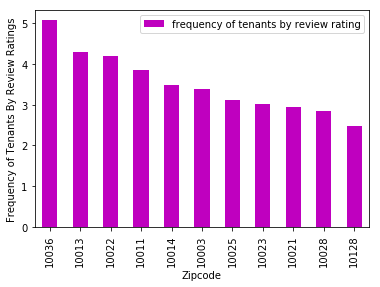

In [51]:
fig, ax = plt.subplots()
cu.plot(kind='bar',x='zipcode', y='Frequency of Tenants by review rating', ax=ax, color='m')
ax.set_xlabel("Zipcode")
ax.set_ylabel('Frequency of Tenants By Review Ratings')
plt.show()

As you can see Zipcode 10036 has highest frequency of tenants leaving positive reviews while 10128 has the lowest frequency of tenants leaving positive reviews.

One measure which I think is the most important metric which denotes profitability is the Return on Investment. Let's see how ROI looks like in comparison with Zipcodes

In [52]:
#Get Sum of Costs by Zipcode in One Dataframe
pt=pd.DataFrame.pivot_table(merge_data,index=['zipcode'],values=['Cost'],aggfunc='sum',fill_value=0)
pt.rename(columns={'Cost':'Sum of Cost'}, inplace= True)
pt= pt.reset_index()
pt.head()

,zipcode,Sum of Cost
0,10003,236219200
1,10011,208094200
2,10013,208780800
3,10014,232351200
4,10021,33707900


In [53]:
#Get Sum of Prices by Zipcode in One Dataframe
ps=pd.DataFrame.pivot_table(merge_data,index=['zipcode'],values=['price'],aggfunc='sum',fill_value=0)
ps.rename(columns={'price':'Sum of Price'}, inplace= True)
ps= ps.reset_index()
ps.head()

,zipcode,Sum of Price
0,10003,34822
1,10011,30832
2,10013,24950
3,10014,30252
4,10021,5203


In [54]:
#Merge both datasets to get Zipcodes, Sum of Prices & Sum of Cost
pu= pd.merge(pt,ps,on=['zipcode'], how='inner')
pu.head()

,zipcode,Sum of Cost,Sum of Price
0,10003,236219200,34822
1,10011,208094200,30832
2,10013,208780800,24950
3,10014,232351200,30252
4,10021,33707900,5203


As we know, price is per day & cost is for 1 year, we need to normalize this to check whether we would be able to invest in these zipcodes

In [55]:
# Calculating sum of price over the year
pu['Sum of Price']= pu['Sum of Price']*365

In [56]:
pu.head()

,zipcode,Sum of Cost,Sum of Price
0,10003,236219200,12710030
1,10011,208094200,11253680
2,10013,208780800,9106750
3,10014,232351200,11041980
4,10021,33707900,1899095


In [57]:
#Removing 0 values to compare data for analysis
pu= pu[pu['Sum of Cost'] != 0]
pu= pu[pu['Sum of Price'] != 0]
pu

,zipcode,Sum of Cost,Sum of Price
0,10003,236219200,12710030
1,10011,208094200,11253680
2,10013,208780800,9106750
3,10014,232351200,11041980
4,10021,33707900,1899095
5,10022,75916400,5094305
6,10023,131985000,6546640
7,10025,155680000,11691680
8,10028,64502400,3159075
9,10036,18888100,1787770


Ideal ROI would be Sum of Price / Sum of Cost

In [58]:
pu['Ideal ROI']= (pu['Sum of Price']/ pu['Sum of Cost'])*100

In [59]:
pu.head()

,zipcode,Sum of Cost,Sum of Price,Ideal ROI
0,10003,236219200,12710030,5.380608
1,10011,208094200,11253680,5.407974
2,10013,208780800,9106750,4.361871
3,10014,232351200,11041980,4.752280
4,10021,33707900,1899095,5.633976


Assuming 75% Occupancy Rate, Actual ROI can be calculated by multiplying Occupancy Rate with Ideal ROI

In [60]:
pu['Actual ROI']= pu['Ideal ROI']* 0.75 

In [61]:
pu= pu.sort_values('Actual ROI', ascending=False).groupby('zipcode').head()#This groups by values in descending order
pu.head()

,zipcode,Sum of Cost,Sum of Price,Ideal ROI,Actual ROI
9,10036,18888100,1787770,9.465060,7.098795
7,10025,155680000,11691680,7.510072,5.632554
5,10022,75916400,5094305,6.710414,5.032811
4,10021,33707900,1899095,5.633976,4.225482
1,10011,208094200,11253680,5.407974,4.055980


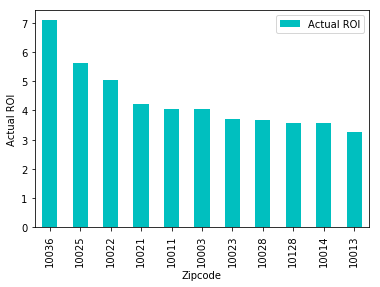

In [62]:
fig, ax = plt.subplots()
pu.plot(kind='bar',x='zipcode', y='Actual ROI', ax=ax, color='c')
ax.set_xlabel("Zipcode")
ax.set_ylabel('Actual ROI')
plt.show()

We can clearly see that the top 3 Zipcodes who would generate maximum Return on Investment are 10036, 10025 & 10022

# Conclusion:

The Goal was to identify zip codes which would generate most profit in New York City.



The definition of profit was not given & hence zip codes to can vary to the criteria of:


Return On Investment (ROI): The top 3 zip codes to invest are 10036, 10025, 10022

Frequency of Tenants based on Ratings score (Brand Awareness): The top 3 zip codes to invest are 10036, 10013, 10022

Frequency of Tenants (Popularity): The top 3 zip codes to invest are 10028, 10128, 10013


Total Listings (Market Analysis): The top 3 zip codes to invest may depend on if we want to target market with less host listings or more